In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Load dataset 
df = pd.read_excel("housing.xlsx") 

In [7]:
# Display basic info 
display(df.head()) 
display(df.info()) 
df.dropna(inplace=True)  # Handle missing values 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


None

In [9]:
# Select features and target 
features = ["median_income", "total_rooms", "housing_median_age", "population"] 
target = "median_house_value" 
X = df[features] 
y = df[target]

In [11]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize features 
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [15]:
# Training Linear Regression model 
lr_model = LinearRegression() 
lr_model.fit(X_train_scaled, y_train) 
lr_preds = lr_model.predict(X_test_scaled) 

In [17]:
# Train Random Forest model 
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) 
rf_model.fit(X_train, y_train) 
rf_preds = rf_model.predict(X_test)

In [19]:
# Train Decision Tree model 
dt_model = DecisionTreeRegressor(random_state=42) 
dt_model.fit(X_train, y_train) 
dt_preds = dt_model.predict(X_test)

In [23]:
# Evaluation function 
def evaluate_model(y_true, y_pred, model_name): 
    mae = mean_absolute_error(y_true, y_pred) 
    rmse = np.sqrt(mean_squared_error(y_true, y_pred)) 
    r2 = r2_score(y_true, y_pred) 
    print(f"{model_name} Performance:\nMAE: {mae}\nRMSE: {rmse}\nR2 Score: {r2}\n")

In [26]:
# Evaluate all models 
evaluate_model(y_test, lr_preds, "Linear Regression") 
evaluate_model(y_test, rf_preds, "Random Forest") 
evaluate_model(y_test, dt_preds, "Decision Tree") 

Linear Regression Performance:
MAE: 60866.56099957578
RMSE: 81256.381156524
R2 Score: 0.5171837519405795

Random Forest Performance:
MAE: 56851.29269880107
RMSE: 78358.72964901068
R2 Score: 0.5510048014523643

Decision Tree Performance:
MAE: 76149.28015659408
RMSE: 106100.7287706306
R2 Score: 0.17680323048134117



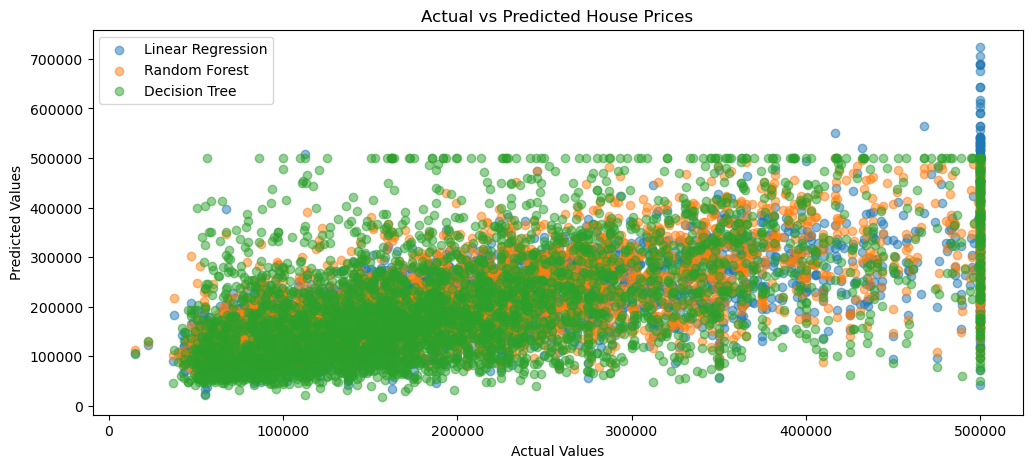

In [28]:
# Plot actual vs predicted values 
plt.figure(figsize=(12, 5)) 
plt.scatter(y_test, lr_preds, label="Linear Regression", alpha=0.5) 
plt.scatter(y_test, rf_preds, label="Random Forest", alpha=0.5) 
plt.scatter(y_test, dt_preds, label="Decision Tree", alpha=0.5) 
plt.xlabel("Actual Values") 
plt.ylabel("Predicted Values") 
plt.legend() 
plt.title("Actual vs Predicted House Prices") 
plt.show()

In [30]:
# This scatter plot visualizes the Actual vs Predicted House Prices for three different models: 
# • Linear Regression (Blue) 
# • Random Forest (Orange) 
# • Decision Tree (Green) 
#    Interpretation: 
#        1. X-axis (Actual Values): Represents the actual house prices in the dataset. 
#        2. Y-axis (Predicted Values): Represents the house prices predicted by the models. 
# Key Observations: 
#     • Ideally, all points should align along the diagonal (y = x line), meaning predicted values closely match 
#     actual values. 
#     • The Random Forest (Orange) and Decision Tree (Green) models seem to cluster more around certain 
#     price levels, indicating they might be capturing more non-linearity in the data. 
#     • The Linear Regression model (Blue) seems to be more spread out, showing its limitation in capturing 
#     complex relationships. 
#     • There is a sharp clustering at the highest price level (500,000), likely due to a data cap in the dataset 
#     (price ceiling effect). 
# Takeaways: 
#      • Random Forest and Decision Tree models likely perform better than Linear Regression, as they can handle 
#       non-linear relationships. 
#      • Linear Regression predictions appear more dispersed, indicating it might not be the best model for this 
#      dataset. 
#      • More fine-tuning and feature engineering could help improve all models. 
#

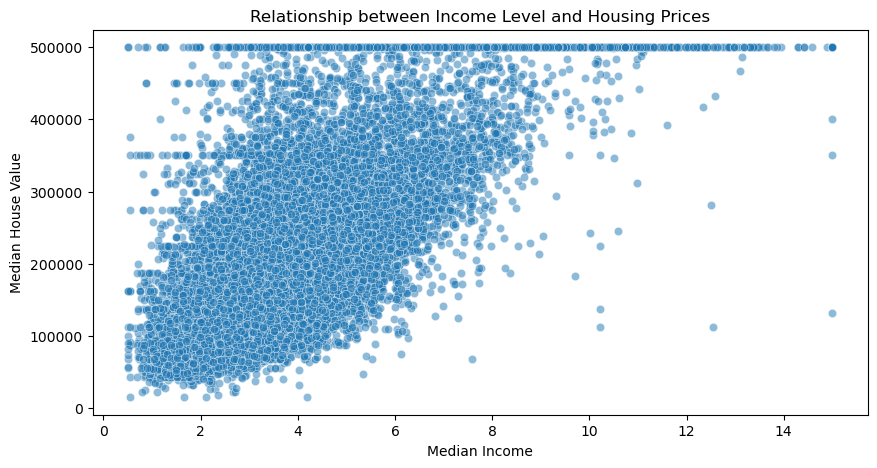

In [32]:
# Plot relationship between median income and house prices 
plt.figure(figsize=(10, 5)) 
sns.scatterplot(x=df['median_income'], y=df['median_house_value'], alpha=0.5) 
plt.xlabel("Median Income") 
plt.ylabel("Median House Value") 
plt.title("Relationship between Income Level and Housing Prices") 
plt.show() 

In [36]:
# This scatter plot visualizes the relationship between median income and median house value in California. 
#    Axes Explanation: 
#      • X-axis (Median Income): Represents the median income of households in different areas. 
#      • Y-axis (Median House Value): Represents the median house price in those areas. 
#   Key Observations: 
#        1. Positive Correlation: 
#          o As median income increases, house prices generally tend to increase. This indicates a positive 
#          relationship—higher income levels are associated with higher house values. 
#        2. Price Ceiling Effect (~500,000): 
#          o A significant number of points are capped at $500,000 (upper boundary). This suggests that the 
#          dataset might have a maximum price limit, meaning some houses could have been valued higher 
#          but are recorded as $500,000. 
#        3. Most Data Points are Clustered Around Lower Incomes: 
#          o A large concentration of data points is around median income levels between 1 and 6, meaning 
#            most houses in the dataset belong to areas with relatively lower median incomes. 
#        4. Outliers at High-Income Levels: 
#          o A few properties with very high median incomes (~10-15) do not show a strict trend, meaning 
#          that income alone does not fully determine house prices. 
#    Takeaways: 
#       • Income level is a strong predictor of house prices, but there are other factors at play. 
#       • A price cap at $500,000 might be distorting the true trend, and removing this cap (if possible) could 
#          reveal more insights. 
#       • Other features like location, total rooms, population density, and proximity to business centers should 
#         be considered for a more comprehensive analysis.